<a href="https://colab.research.google.com/github/Fbehr-data/Radiant-Earth-Spot-Crop/blob/felix_branch/notebooks/EDA_spectral_indices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook EDA - Spectral Indices

A list of all indices can be found here:
https://www.indexdatabase.de/db/s-single.php?id=96

I selected just a few indices based on these papers:
DOI: 
* 10.1080/24751839.2019.1694765
* 10.5073/vitis.2019.58.special-issue.33-38

Following Bands and Indices are investigated regarding the separability of the classes.
* Bands    [02/03/04/08/11/12]
* Indices  [NDVI, SIPI2, WET, PVR]
* PCA      [PC1]

Connect to Google Drive and have access to the data

In [1]:
# connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Set Working Directory

In [2]:
import os
# set working directory
# os.getcwd()
path = '/content/drive/MyDrive/Radiant_Earth_Spot_Crop'
# Set Workign directory and print
os.chdir(path)
print(f'Current Working directory: {path}')

Current Working directory: /content/drive/MyDrive/Radiant_Earth_Spot_Crop


Load packages

In [20]:
# import libraries
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# To avoid unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/Radiant_Earth_Spot_Crop/data/mean_band_perField_perDate.csv')
df.head()

,field_id,date,label,B02,B03,B04,B08,B11,B12,CLM
0,1,2017-04-01,4,21.934084,29.180065,35.554660,62.490353,68.39710,46.040190,255.0
1,1,2017-04-11,4,14.844051,23.114147,30.607718,58.736336,73.43569,48.863342,0.0
2,1,2017-04-21,4,13.385852,21.596462,29.223473,57.065918,73.66881,49.313503,0.0
3,1,2017-05-01,4,15.408361,22.471062,29.371382,56.434082,71.05788,46.557877,0.0
4,1,2017-05-11,4,54.829582,65.739550,72.906750,95.672030,66.14791,58.643085,255.0


In [9]:
# Split in Target and Feature
y = df['label']
X = df.drop('label', axis=1)

# Split test train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X_train and y_train for EDA
df_train = pd.concat([X_train, y_train], axis = 1)
df_train

,field_id,date,B02,B03,B04,B08,B11,B12,CLM,label
3070942,87820,2017-10-06,30.943320,41.748990,55.089070,73.947365,102.457490,91.979760,0.0,9
2323203,66362,2017-09-23,24.118288,35.698833,47.897278,89.217120,117.550190,101.533070,0.0,2
3647161,104111,2017-09-06,6.828947,7.252632,5.634211,25.265789,13.328947,7.023684,0.0,2
3595035,102664,2017-07-25,205.662750,206.971480,209.335570,214.860730,65.100670,31.872482,255.0,2
2362394,67476,2017-11-27,29.307158,44.031310,58.643143,78.472664,128.504470,104.527336,0.0,1
...,...,...,...,...,...,...,...,...,...,...
4044887,115404,2017-10-03,14.676767,17.649832,17.599327,48.151516,48.198654,34.134680,0.0,4
1136074,32500,2017-10-08,18.343150,27.148357,33.588900,86.502830,96.764440,64.424690,0.0,2
1570006,44838,2017-07-30,2.375000,3.252976,4.244048,5.901786,9.949405,8.934524,0.0,4
2234489,63790,2017-09-08,10.960526,16.559210,16.463816,58.996710,57.253290,33.486843,0.0,5


# Explorative Data Analyses (EDA) - Indices




In [18]:
# Calculating spectral Indices
# See here: https://www.indexdatabase.de/db/is.php?sensor_id=96


# Define Function to calculate different indices
# NDVI
def cal_NDVI(Band4: pd.Series, Band8: pd.Series) -> pd.Series:
  return (Band8 - Band4) / (Band8 + Band4) 

# SIPI2
def cal_SIPI2(Band2: pd.Series, Band8: pd.Series, Band4:pd.Series) -> pd.Series:
  return (Band8 - Band2) / (Band8 - Band4)

# WET
def cal_WET(Band2: pd.Series, Band3: pd.Series, Band4:pd.Series, Band8: pd.Series, Band11: pd.Series, Band12:pd.Series) -> pd.Series:
  return 0.1509 * Band2 +0.1973 * Band3 + 0.3279 * Band4 + 0.3406 * Band8 - 0.7112 * Band11 - 0.4572 * Band12

# PVR
def cal_PVR(Band3: pd.Series, Band4: pd.Series) -> pd.Series:
  return (Band3 - Band4) / (Band3 + Band4) 

# First PC1
def cal_PC1(all_Bands: pd.DataFrame) -> pd.Series:
  # create PCA model
  pca = PCA(n_components=2)
  
  # fit on bands
  pca.fit(all_Bands)

  # Print results
  print('****' * 10)
  print(f'Explained Variance of the first 2 components:')
  print(f'PC1: {np.around(pca.explained_variance_ratio_[0], 3) * 100} %')
  print(f'PC2: {np.around(pca.explained_variance_ratio_[1], 3) * 100} %')
  print(f'Only the first component of the PC will be used.')

  # Tranform data
  pca_df = pca.transform(all_Bands)

  return pd.DataFrame(data = principalComponents
             ,columns = ['PC1', 'PC2'])['PC1']

# Calculate Features

# Returns dataframe with additional features
def cal_features(df:pd.DataFrame) -> pd.DataFrame:

  # Define list with all bands
  Bands = ['B02', 'B03', 'B04', 'B08', 'B11', 'B12']

  # calculate Indices and PC1
  df['NDVI'] = cal_NDVI(df.B04, df.B08)
  df['SIPI2'] = cal_SIPI2(df.B02, df.B04, df.B08)
  df['WET'] = cal_WET(df.B02,df.B03, df.B04, df.B08, df.B11, df.B12)
  df['PVR'] = cal_PVR(df.B03, df.B04)
  df['PC1'] = cal_PC1(df[Bands])

  return df 


In [26]:
# Add additional features to the dataframe
df_features = cal_features(df_train)

# Check Data and columns
df_features

****************************************
Explained Variance of the first 2 components:
PC1: 90.0 %
PC2: 8.1 %
Only the first component of the PC will be used.


,field_id,date,B02,B03,B04,B08,B11,B12,CLM,label,NDVI,SIPI2,WET,PVR,PC1
3070942,87820,2017-10-06,30.943320,41.748990,55.089070,73.947365,102.457490,91.979760,0.0,9,0.146147,-1.280378,-58.764312,-0.137757,-74.054307
2323203,66362,2017-09-23,24.118288,35.698833,47.897278,89.217120,117.550190,101.533070,0.0,2,0.301353,-0.575486,-73.246917,-0.145921,-13.856057
3647161,104111,2017-09-06,6.828947,7.252632,5.634211,25.265789,13.328947,7.023684,0.0,2,0.635326,0.060858,0.223642,0.125587,NaN
3595035,102664,2017-07-25,205.662750,206.971480,209.335570,214.860730,65.100670,31.872482,255.0,2,0.013025,-0.664745,152.820985,-0.005679,NaN
2362394,67476,2017-11-27,29.307158,44.031310,58.643143,78.472664,128.504470,104.527336,0.0,1,0.144619,-1.479410,-80.115574,-0.142312,279.179390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4044887,115404,2017-10-03,14.676767,17.649832,17.599327,48.151516,48.198654,34.134680,0.0,4,0.464666,-0.095658,-22.016997,0.001433,NaN
1136074,32500,2017-10-08,18.343150,27.148357,33.588900,86.502830,96.764440,64.424690,0.0,2,0.440613,-0.288124,-49.672822,-0.106039,349.970893
1570006,44838,2017-07-30,2.375000,3.252976,4.244048,5.901786,9.949405,8.934524,0.0,4,0.163391,-1.127468,-6.758910,-0.132195,-40.005076
2234489,63790,2017-09-08,10.960526,16.559210,16.463816,58.996710,57.253290,33.486843,0.0,5,0.563644,-0.129389,-25.614884,0.002889,-95.484820


In [27]:
# Change datatype str to Datetime of timecolumn
df_features['date'] = pd.to_datetime(df_features["date"])

# create relevant subset -> Calculate the month in the year
df_features['month'] = df_features['date'].dt.month

# Plot Function

In [39]:
# plot function to see time 
def plot_2_features(data:pd.DataFrame, feature1:str, feature2:str):

  plt.style.use('ggplot')
  # set size 
 

  fig, axs = plt.subplots(ncols=2, figsize =(25,8))

  # create dictionary for date and label --> increase readability
  dic_month = {4: 'April', 5: 'Mai', 6: 'June', 7: 'July',
             8: 'August', 9: 'September', 10: 'October', 11: 'November'}

  dic_class = {1: 'Lucerne', 2: 'Planted Pastures', 3: 'Fallow', 4: 'Wine Grapes',
             5: 'Weeds', 6: 'Small grain grazing', 7: 'Wheat', 8: 'Canola', 9: 'Rooibos'}

  # Map new label -->TODO: Unknown reason for warning
  data['Month'] = data['month'].map(dic_month)
  data['Croptype'] = data.loc[:, ('label')].map(dic_class)

  sns.lineplot(data=data, x="Month", y=feature1, hue="Croptype", palette="Dark2", ax = axs[0])
  sns.lineplot(data=data, x="Month", y=feature2, hue="Croptype", palette="Dark2", ax = axs[1])

def plot_1_feature(data:pd.DataFrame, feature:str):

  # set size 
  plt.figure(figsize=(12,6))

  # create dictionary for date and label --> increase readability
  dic_month = {4: 'April', 5: 'Mai', 6: 'June', 7: 'July',
             8: 'August', 9: 'September', 10: 'October', 11: 'November'}

  dic_class = {1: 'Lucerne', 2: 'Planted Pastures', 3: 'Fallow', 4: 'Wine Grapes',
             5: 'Weeds', 6: 'Small grain grazing', 7: 'Wheat', 8: 'Canola', 9: 'Rooibos'}

  # Map new label -->TODO: Unknown reason for warning
  data['Month'] = data['month'].map(dic_month)
  data['Croptype'] = data.loc[:, ('label')].map(dic_class)

  sns.lineplot(data=data, x="Month", y=feature, hue="Croptype", palette="Dark2")

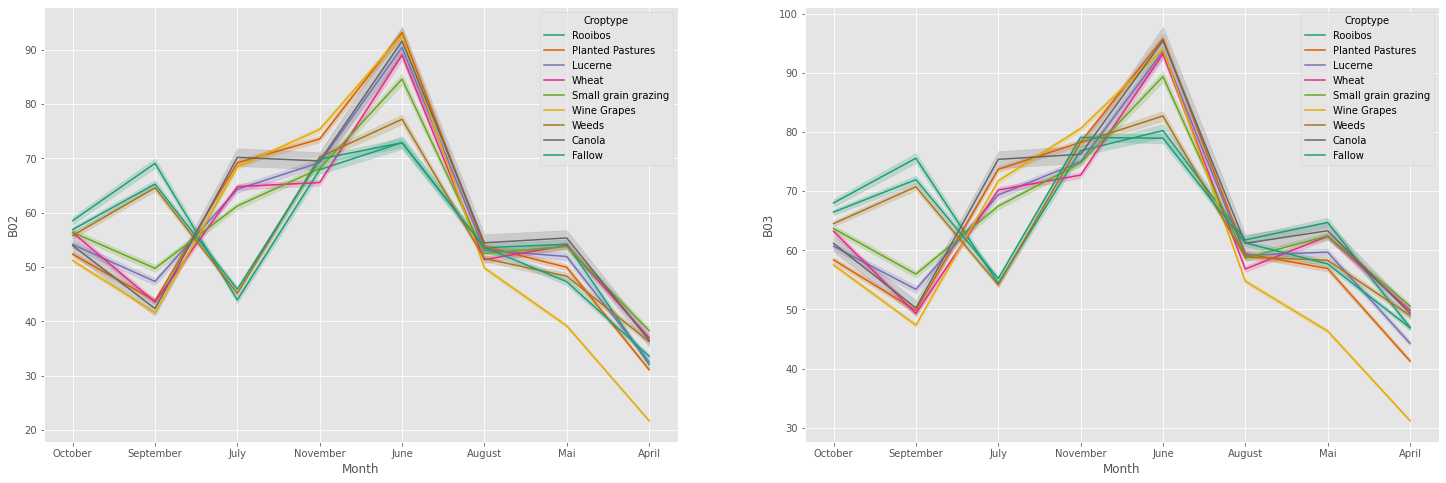

In [41]:
# Plot B02 and B03 Band
plot_2_features(df_features, 'B02', 'B03')

- Seperability B02:
  Rooibos, Fallow, Weed against rest --> September and July
  winegrapes August Mai and April

- Seperability B03:
  Rooibos, Fallow, Weed against rest --> September and July
  winegrapes August Mai and April

- Quite similar

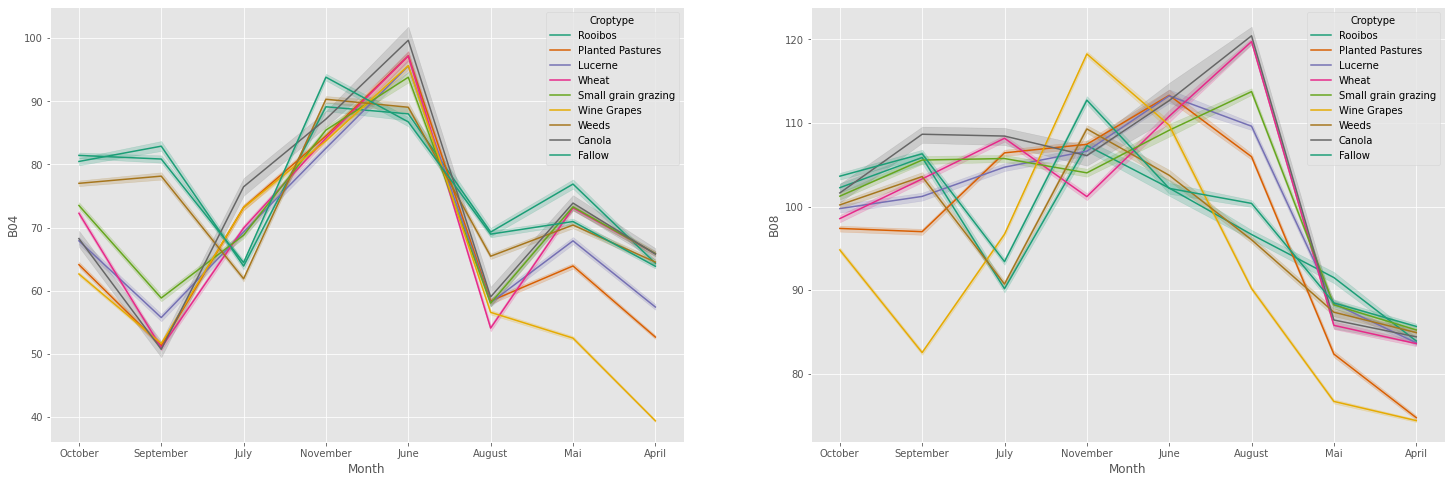

In [42]:
# Plot B02 and B03 Band
plot_2_features(df_features, 'B04', 'B08')

- Seperability B04:
  Rooibos, Fallow, Weed against rest --> September and July
  winegrapes August Mai and April

- Seperability B08:
  Winegrapes --> September
  Canola and Wheat in August

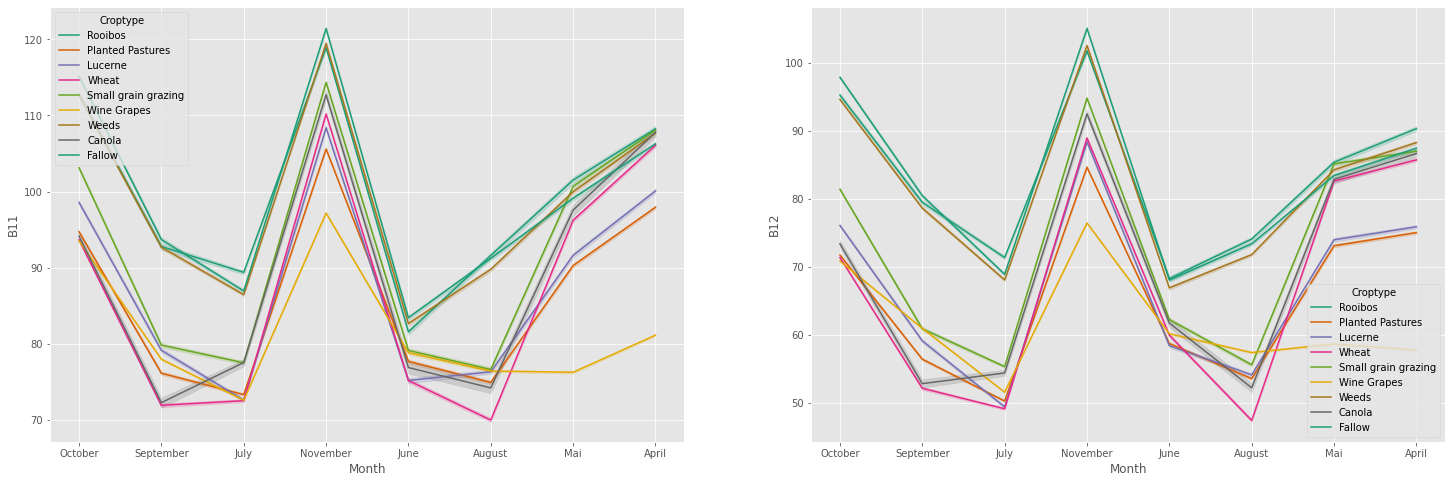

In [43]:
# Plot B11 and B12 Band
plot_2_features(df_features, 'B11', 'B12')

- Seperability B02:
  Rooibos, Fallow, Weed against rest --> September and July
  winegrapes August Mai and April

- Seperability B03:
  Rooibos, Fallow, Weed against rest --> September and July
  winegrapes August Mai and April

- Quite similar

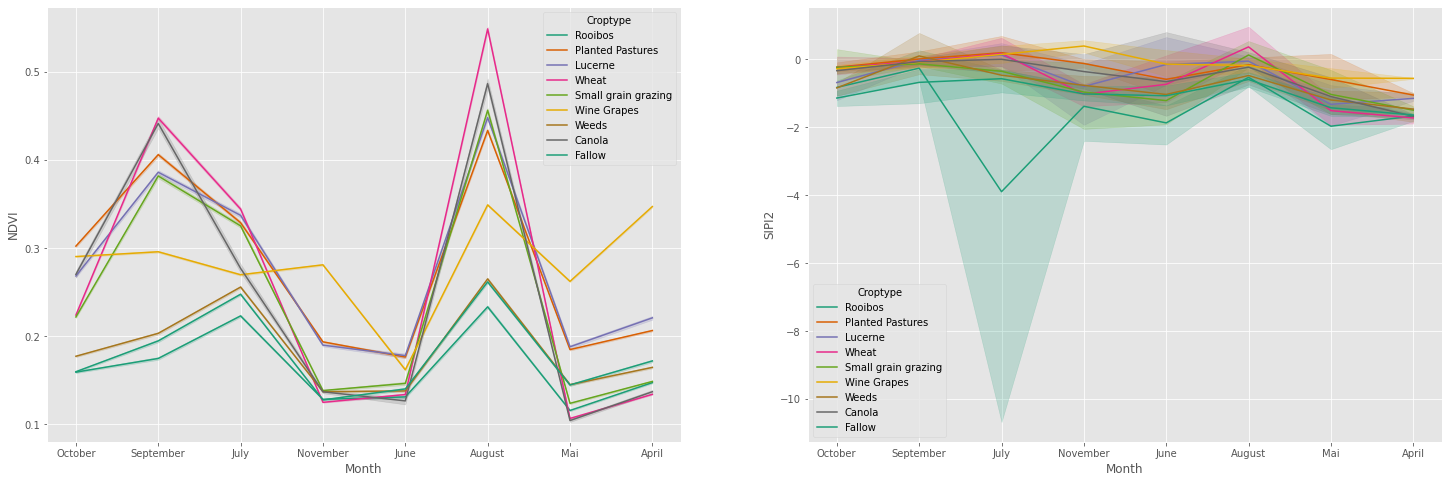

In [44]:
# Plot B02 and B03 Band
plot_2_features(df_features, 'NDVI', 'SIPI2')

- Seperability NDVI:
  Rooibos, Fallow, Weed against rest --> September and July
  winegrapes August Mai and April

- Seperability B03:
  SIPI is not a good seperator

- Quite similar

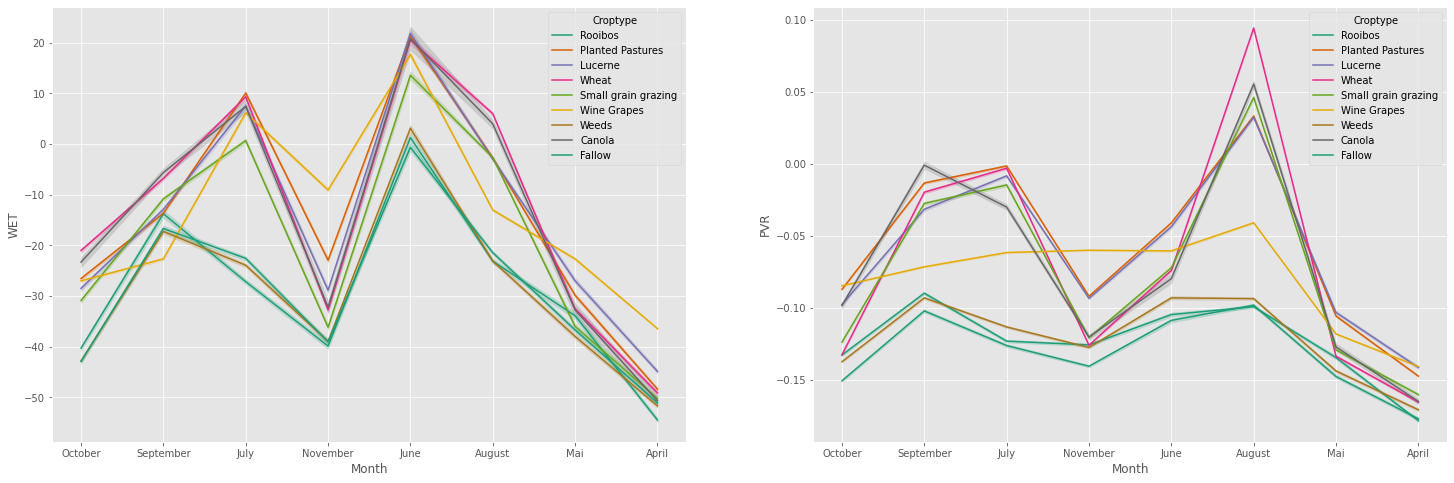

In [45]:
# Plot B02 and B03 Band
plot_2_features(df_features, 'WET', 'PVR')

- Seperability WET:
  Rooibos, Fallow, Weed against rest --> September and July
  winegrapes August Mai and April

- Seperability PVR:
  see November 

- Quite similar

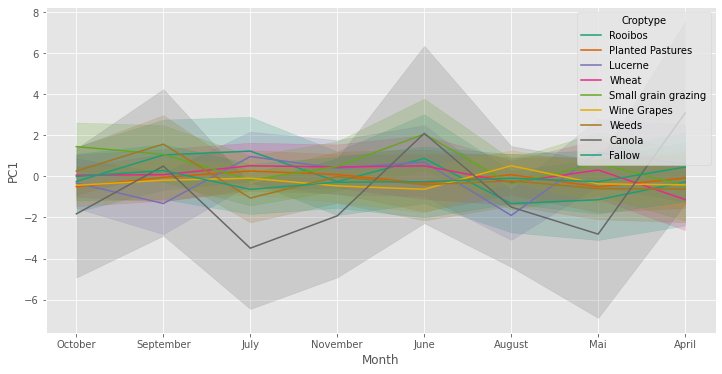

In [46]:
# Plot B02 and B03 Band
plot_1_feature(df_features, 'PC1')

not a good feature for seperability

In [33]:
# Choose random number of fields
sub_fields_id = np.random.choice(df_features.field_id.unique(), 1000, replace=False)

# subset data based on random number of fields
subset_data = df_features.query('field_id in @sub_fields_id')
subset_data

,field_id,date,B02,B03,B04,B08,B11,B12,CLM,label,NDVI,SIPI2,WET,PVR,PC1,month,Month,Croptype
636741,18305,2017-05-24,22.200000,35.200000,54.200000,69.300000,110.200000,98.800000,0.0,5,0.122267,-2.119205,-71.874900,-0.212528,319.935454,5,Mai,Weeds
1825116,52068,2017-07-20,250.377140,244.045720,232.085710,230.045720,141.097140,92.434290,255.0,4,-0.004414,-8.966431,97.777364,0.025119,-87.865405,7,July,Wine Grapes
2976436,85060,2017-09-18,12.793651,20.642857,25.460318,70.071430,74.146830,50.424603,0.0,3,0.466977,-0.283935,-37.569189,-0.104493,-9.386672,9,September,Fallow
1805823,51520,2017-04-21,22.435474,35.492588,49.907740,69.616690,103.492584,80.138930,0.0,7,0.164895,-1.393898,-59.779051,-0.168795,-77.437949,4,April,Wheat
1268409,36243,2017-10-01,25.877855,44.929703,77.237260,103.622150,147.668720,141.098420,0.0,5,0.145886,-1.946546,-96.142791,-0.264454,58.357086,10,October,Weeds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288627,65340,2017-07-08,13.946541,25.838050,37.710693,70.264150,93.006290,79.273580,0.0,3,0.301491,-0.730004,-58.890268,-0.186827,-101.037695,7,July,Fallow
491234,14147,2017-06-30,125.729950,120.531100,116.680855,125.325700,96.102295,68.001640,255.0,7,0.035722,1.046762,24.260719,0.016231,-87.274985,6,June,Wheat
1007293,28902,2017-06-23,10.237804,27.908537,65.121950,82.707310,102.280490,86.957310,0.0,3,0.118957,-3.121014,-55.923930,-0.400013,-96.183657,6,June,Fallow
917040,26276,2017-11-22,12.333333,14.666667,16.333334,31.666666,33.666668,27.000000,255.0,4,0.319444,-0.260870,-15.391934,-0.053763,-82.386019,11,November,Wine Grapes
